In [ ]:
!pip install -q sklearn


In [ ]:
%tensorflow_version 2.x

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf


**Linear Regression**
 
it is used when you have data that correllates in a linear fashion. We are going to use linear regression on a dataset below to make predictions.


In [ ]:
ttctrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # data used for training 
ttceval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # our model will be testd with this data
print(ttctrain.head())

   survived     sex   age  ...     deck  embark_town  alone
0         0    male  22.0  ...  unknown  Southampton      n
1         1  female  38.0  ...        C    Cherbourg      n
2         1  female  26.0  ...  unknown  Southampton      y
3         1  female  35.0  ...        C  Southampton      n
4         0    male  28.0  ...  unknown   Queenstown      y

[5 rows x 10 columns]


In [ ]:
ttctrain.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


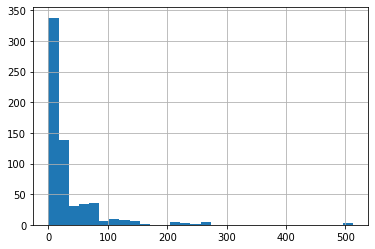

In [ ]:
ttctrain.fare.hist(bins = 30)

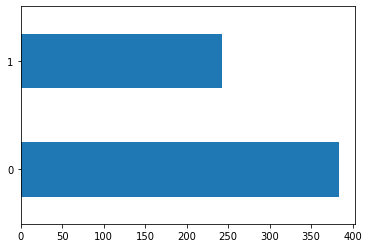

In [ ]:
ttctrain.survived.value_counts().plot(kind = 'barh')

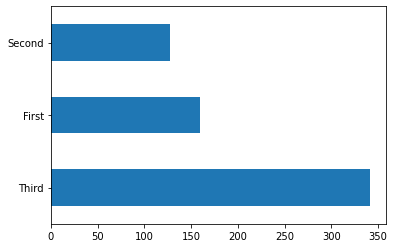

In [ ]:
ttctrain['class'].value_counts().plot(kind = 'barh')

Because the data we are actually trying to predict is if someone survived or not, we seperate that column away from the rest.

In [ ]:
y_train = ttctrain.pop('survived')
y_eval = ttceval.pop('survived')

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

# Feature Columns

This is what is fed into the linear (estimator) model in order to make predictions.


In [ ]:
feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = ttctrain[feature_name].unique() # gets a list of all the unique values in a given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype = tf.float32))

Its good practice to load data in batches

In [ ]:
def create_input_fn(panda_data_df, label_df, num_epochs = 20, shuffle = True, batch_size = 32):
  def input_function():
    dataset_object = tf.data.Dataset.from_tensor_slices((dict(panda_data_df), label_df))
    if shuffle:
      dataset_object = dataset_object.shuffle(1000) #randomize order of data

    dataset_object = dataset_object.batch(batch_size).repeat(num_epochs)
    return dataset_object
  return input_function
    
train_input_fn = create_input_fn(ttctrain, y_train)
eval_input_fn = create_input_fn(ttceval, y_eval, num_epochs = 1, shuffle = False)


# Creating the Model



In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns = feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0hpnho2h', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Training the Model

In [ ]:
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn) 

clear_output()
print(result['accuracy'])


0.7765151


# Making Predictions

Tensorflow is much better at making predictions for a large set of data as opposed to one or two.

In [ ]:
my_result = list(linear_est.predict(eval_input_fn))

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0hpnho2h/model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:
print(my_result)

[{'logits': array([-2.8076859], dtype=float32), 'logistic': array([0.05691025], dtype=float32), 'probabilities': array([0.9430898 , 0.05691026], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-0.97066915], dtype=float32), 'logistic': array([0.27474716], dtype=float32), 'probabilities': array([0.72525287, 0.27474713], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.57263434], dtype=float32), 'logistic': array([0.6393708], dtype=float32), 'probabilities': array([0.36062923, 0.63937086], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.15769766], dtype

# Getting the Prediction Results

In [ ]:
i = 0
while i < len(my_result):
  print(ttceval.loc[i]) # To get the details of the person
  print(y_eval.loc[i]) # To see if they actually survived or not
  print(my_result[i]['probabilities'][1]) #The last index of 1 represents that they survived, 0 would represent not survive.
  i = i + 50


sex                          male
age                            35
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
0
0.056910258
sex                         male
age                           40
n_siblings_spouses             1
parch                          1
fare                        15.5
class                      Third
deck                     unknown
embark_town           Queenstown
alone                          n
Name: 50, dtype: object
0
0.07404097
sex                          male
age                            30
n_siblings_spouses              0
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 100, dtype: